<a href="https://colab.research.google.com/github/KobOlek/QR-coder/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files

model_dir = files.upload()
model_dir = list(model_dir)[0]

model = load_model(model_dir)

Saving my_flowers_model (1).h5 to my_flowers_model (1).h5


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
dataset_dir = pathlib.Path(dataset_dir).with_suffix('')

228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
batch_size = 32
img_width = 180
img_height = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split = .2,
    subset="training",
    seed=123,
    image_size = (img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split = .2,
    subset="validation",
    seed=123,
    image_size = (img_width, img_height),
    batch_size=batch_size
)

class_names = train_ds.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
model.evaluate(train_ds, verbose=2)

92/92 - 36s - loss: 0.1830 - accuracy: 0.9346 - 36s/epoch - 393ms/step


[0.18301400542259216, 0.9346048831939697]

Saving OIP (6).jpg to OIP (6).jpg
1/1 [==============================] - 0s 41ms/step
На зображенні roses (94.74% ймовірність)


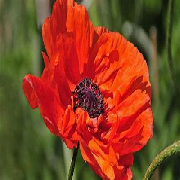

In [ ]:
from google.colab import files
img = files.upload()

img = list(img)[0]

img = tf.keras.utils.load_img(
    img, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# make predictions
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print inference result
print("На зображенні {} ({:.2f}% ймовірність)".format(
	class_names[np.argmax(score)],
	100 * np.max(score)))

# show the image itself
img.show()